In [7]:
import data_processing as dp
import model_evaluation as me
import torch
from torch import tensor

import importlib

In [8]:
EXCL_EMG = True

if EXCL_EMG: DIR = 'results/excl_emg/all/tuned'
else:        DIR = 'results/incl_emg/all/tuned'

LABELS =  ['Fx_l', 'Fy_l', 'Fz_l', 'Tz_l', 'Fx_r', 'Fy_r', 'Fz_r', 'Tz_r']

# Test Subject

In [9]:
####################
# LOADING THE DATA #
####################
DATA_DIR = "../segmented_data/"
SUBJECTS = ['HH']
SCENES = ['FlatWalkStraight', 'FlatWalkCircular', 'FlatWalkStatic']
TRIALS = ('all')

gait_cycles = dp.read_gait_cycles(DATA_DIR, SUBJECTS, SCENES, TRIALS, drop_emgs=EXCL_EMG)

Reading all trials of ['HH'].


In [10]:
#############
# FILTERING #
#############
df_filtered = dp.filter_together(gait_cycles)

Dropped BW jogging_4_badForcePlate.csv of subject HH.
Dropped Sidestepping normal_1.csv of subject HH.


In [11]:
######################
# FEATURE EXTRACTION #
######################
X_test = dp.extract_features(df_filtered)
Y_test = df_filtered[['Fx_l', 'Fy_l', 'Fz_l', 'Tz_l',
                      'Fx_r', 'Fy_r', 'Fz_r', 'Tz_r']]

Y_test = tensor(Y_test.to_numpy().reshape((-1, 8)), dtype=torch.float32)

In [12]:
from models.stm_regressor import STMRegressor

full_grf_estimator = STMRegressor(DIR)
Y_pred = full_grf_estimator(X_test)

MLP Fx has 187 input neurons, [61] hidden neurons and 1 output neurons.
MLP Fy has 187 input neurons, [60] hidden neurons and 1 output neurons.
MLP Fz has 187 input neurons, [58] hidden neurons and 1 output neurons.
MLP Tz has 187 input neurons, [62] hidden neurons and 1 output neurons.


In [13]:
nr_of_vars = Y_test.shape[1]
for i in range(nr_of_vars):
    print(LABELS[i])
    me.print_metrics(Y_test[:, i].reshape(-1, 1), Y_pred[:, i].reshape(-1, 1), scatterplot=False)

Fx_l
Performance on the test set:
NRMSE = 0.0890
r = 0.8386889183017232
Fy_l
Performance on the test set:
NRMSE = 0.0699
r = 0.8947154297927251
Fz_l
Performance on the test set:
NRMSE = 0.0458
r = 0.9857825679514625
Tz_l
Performance on the test set:
NRMSE = 0.1448
r = 0.4456571150844936
Fx_r
Performance on the test set:
NRMSE = 0.0867
r = 0.8425063138843955
Fy_r
Performance on the test set:
NRMSE = 0.0759
r = 0.8624973104240404
Fz_r
Performance on the test set:
NRMSE = 0.0477
r = 0.9853350856958478
Tz_r
Performance on the test set:
NRMSE = 0.1733
r = 0.4771172200480108


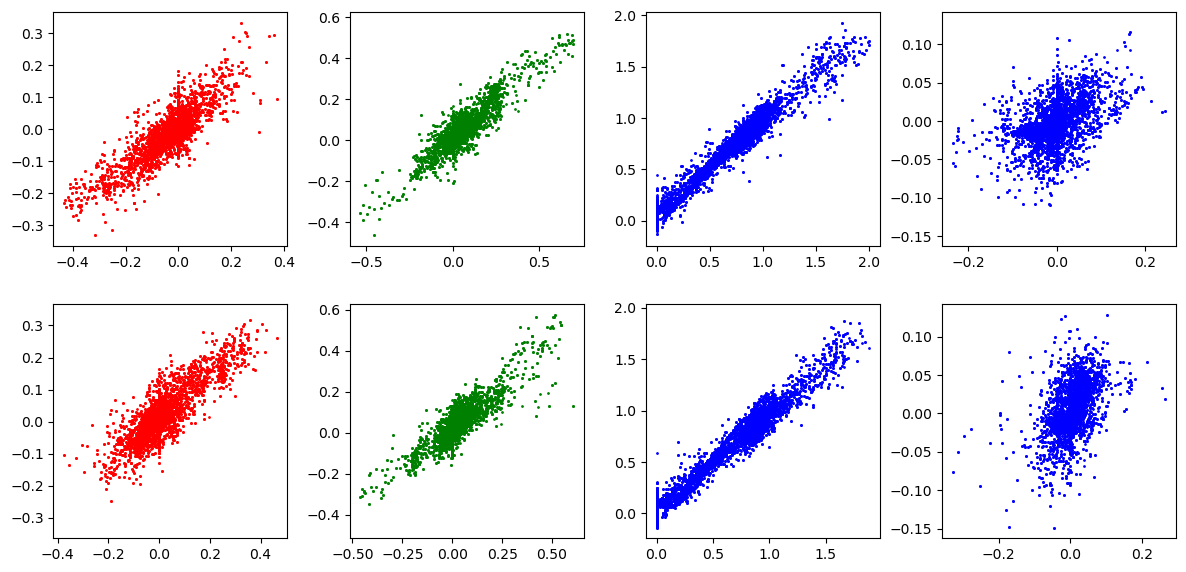

In [14]:
importlib.reload(me)
me.plot_correlations(Y_test, Y_pred)

# Disturbance Trials

In [15]:
##################################
# LOADING THE DISTURBANCE TRIALS #
##################################
DATA_DIR = "../segmented_data/"
SUBJECTS = ['AT', 'EL', 'RB', 'RL', 'TT']
SCENES = ['FlatWalkDisturbance']
TRIALS = ('all')

perturbations = dp.read_gait_cycles(DATA_DIR, SUBJECTS, SCENES, TRIALS, drop_emgs=EXCL_EMG)

Reading all trials of ['AT', 'EL', 'RB', 'RL', 'TT'].


In [16]:
#############
# FILTERING #
#############
df_filtered = dp.filter_together(perturbations)

Dropped Type 3 disturbance_6_badForcePlate.csv of subject AT.
Dropped Type 3 disturbance_5_badForcePlate.csv of subject EL.
Dropped Type 1 disturbance_1.csv of subject TT.


In [17]:
######################
# FEATURE EXTRACTION #
######################
X_test = dp.extract_features(df_filtered)
Y_test = df_filtered[['Fx_l', 'Fy_l', 'Fz_l', 'Tz_l',
                      'Fx_r', 'Fy_r', 'Fz_r', 'Tz_r']]

Y_test = tensor(Y_test.to_numpy().reshape((-1, 8)), dtype=torch.float32 )

In [18]:
importlib.reload(me)
Y_pred = full_grf_estimator(X_test)

In [19]:
nr_of_vars = Y_test.shape[1]
for i in range(nr_of_vars):
    me.print_metrics(Y_test[:, i].reshape(-1, 1), Y_pred[:, i].reshape(-1, 1), scatterplot=False)


Performance on the test set:
NRMSE = 0.0865
r = 0.8664213300320678
Performance on the test set:
NRMSE = 0.0641
r = 0.9156525493010579
Performance on the test set:
NRMSE = 0.0586
r = 0.9815470373445867
Performance on the test set:
NRMSE = 0.1404
r = 0.4540916402206362
Performance on the test set:
NRMSE = 0.0816
r = 0.8852284769154358
Performance on the test set:
NRMSE = 0.0498
r = 0.935075799061369
Performance on the test set:
NRMSE = 0.0525
r = 0.9848998301434181
Performance on the test set:
NRMSE = 0.1340
r = 0.5030484123883661


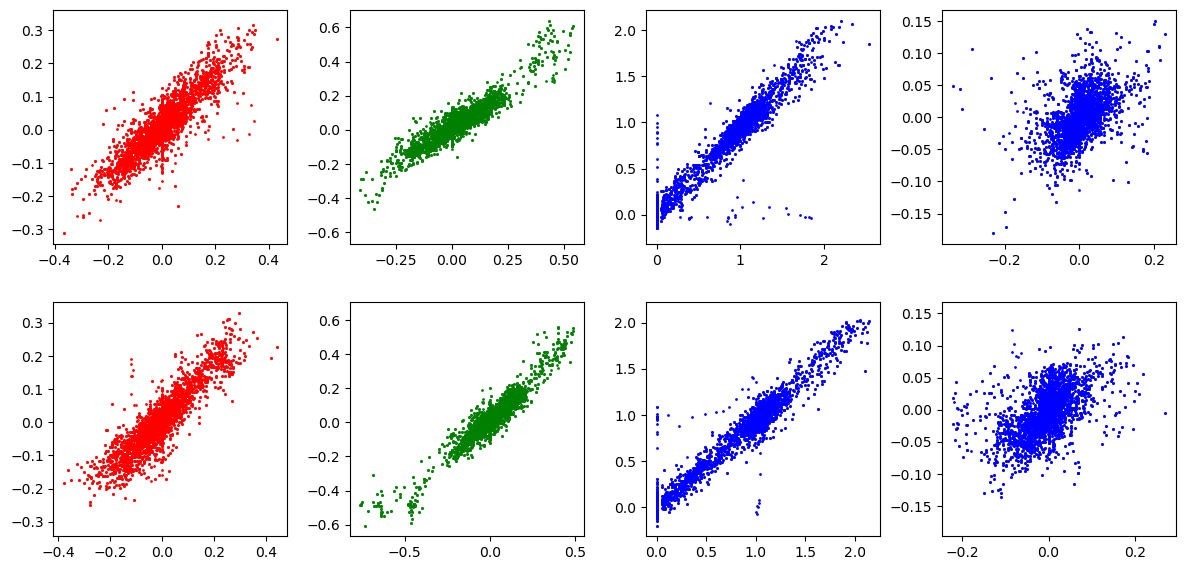

In [20]:
me.plot_correlations(Y_test, Y_pred)